In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
url = 'https://www.amazon.in/product-reviews/B089MT34QG/ref=cm_cr_arp_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
reviewlist = []

In [3]:
def get_soup(url):
    r = requests.get(url)
    print(r.text)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews:', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in range(1,10):
    soup = get_soup(f'https://www.amazon.in/product-reviews/B089MT34QG/ref=cm_cr_arp_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-last'}):
        pass
    else:
        break

<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>

<!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'>
<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">
<link rel="dns-prefetch" href="https://m.media-amazon.com">
<link rel="dns-prefetch" href="https://completion.amazon.com">

<!-- sp:feature:aui-assets -->
<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,418YjvsUB+L.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31ZcpBfSgNL.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0sL.css,11zGrJZ9D2

In [6]:
df = pd.DataFrame(reviewlist)
df.to_excel('rating.xlsx', index=False)
print('Fin.')

Fin.


In [7]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
import seaborn as sns
from textblob import TextBlob
from nltk import tokenize
from nltk.sentiment.util import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [9]:
data = pd.read_csv("rating.csv",encoding = "ISO-8859-1")
data.head()

,product,title,rating,body
0,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Poor quality One plus 9 device,1,The product just overheating.. it is unbelieva...
1,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Overheating nd battery problem,1,Just got d phone today... frm day 1 too much o...
2,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Kuddos !!,4,One day delivery. Very fast. Kuddos on that.Th...
3,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",SENDING USED PRODUCT TO CUSTOMERS,1,SENDING USED PRODUCT TO CUSTOMERSI BOUGHT IT W...
4,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Im fan of i,1,Oneplus is cheating us on 5gLook at the price ...


In [10]:
data.shape

(100, 4)

In [11]:
data.dtypes

product    object
title      object
rating      int64
body       object
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  100 non-null    object
 1   title    100 non-null    object
 2   rating   100 non-null    int64 
 3   body     100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


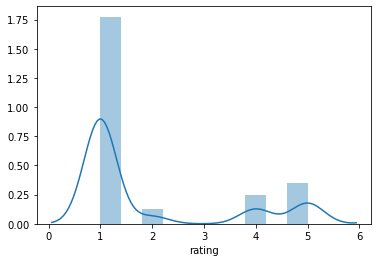

In [13]:
sns.distplot(data['rating'])

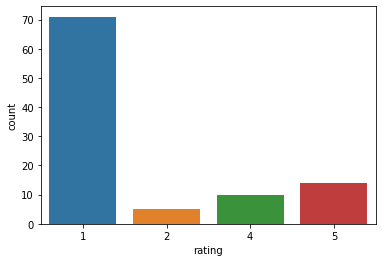

In [14]:
sns.countplot(x='rating',data=data)

In [15]:
df['rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0    1.0
1    1.0
2    4.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    5.0
9    1.0
Name: rating, dtype: float64>

In [16]:
df['rating'].isnull().sum()

0

In [17]:
sid.polarity_scores(df.loc[0]['body'])

{'neg': 0.143, 'neu': 0.78, 'pos': 0.077, 'compound': -0.7865}

In [18]:
df['scores'] = df['body'].apply(lambda body: sid.polarity_scores(body))
df.head()

,product,title,rating,body,scores
0,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Poor quality One plus 9 device,1.0,The product just overheating.. it is unbelieva...,"{'neg': 0.143, 'neu': 0.78, 'pos': 0.077, 'com..."
1,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Overheating nd battery problem,1.0,Just got d phone today... frm day 1 too much o...,"{'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'comp..."
2,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Kuddos !!,4.0,One day delivery. Very fast. Kuddos on that.Th...,"{'neg': 0.041, 'neu': 0.683, 'pos': 0.276, 'co..."
3,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",SENDING USED PRODUCT TO CUSTOMERS,1.0,SENDING USED PRODUCT TO CUSTOMERSI BOUGHT IT W...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Im fan of i,1.0,Oneplus is cheating us on 5gLook at the price ...,"{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp..."


In [19]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

In [20]:
df.head()

,product,title,rating,body,scores,compound,sentiment_type
0,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Poor quality One plus 9 device,1.0,The product just overheating.. it is unbelieva...,"{'neg': 0.143, 'neu': 0.78, 'pos': 0.077, 'com...",-0.7865,NEGATIVE
1,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Overheating nd battery problem,1.0,Just got d phone today... frm day 1 too much o...,"{'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'comp...",-0.3612,NEGATIVE
2,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Kuddos !!,4.0,One day delivery. Very fast. Kuddos on that.Th...,"{'neg': 0.041, 'neu': 0.683, 'pos': 0.276, 'co...",0.9649,POSITIVE
3,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",SENDING USED PRODUCT TO CUSTOMERS,1.0,SENDING USED PRODUCT TO CUSTOMERSI BOUGHT IT W...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
4,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Im fan of i,1.0,Oneplus is cheating us on 5gLook at the price ...,"{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...",-0.5574,NEGATIVE


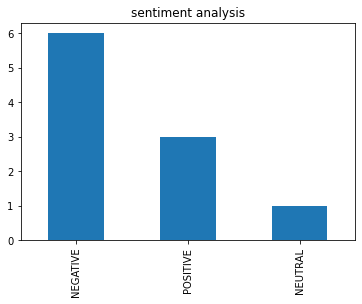

In [21]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [62]:
new_data = data.rename(columns = {"analysis": "Emotion"})
new_data.head(10)

,product,title,rating,body,subjectivity,polarity,Emotion
0,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Poor quality One plus 9 device,1,The product just overheating.. it is unbelieva...,0.694898,-0.081633,Negative
1,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Overheating nd battery problem,1,Just got d phone today... frm day 1 too much o...,0.600000,0.100000,Positive
2,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Kuddos !!,4,One day delivery. Very fast. Kuddos on that.Th...,0.604667,0.246000,Positive
3,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",SENDING USED PRODUCT TO CUSTOMERS,1,SENDING USED PRODUCT TO CUSTOMERSI BOUGHT IT W...,0.350000,-0.025000,Negative
4,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Im fan of i,1,Oneplus is cheating us on 5gLook at the price ...,0.666667,-0.500000,Negative
5,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Very Bad and stupid phone,1,Network performance not good and camera perfo...,0.572222,-0.420000,Negative
6,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",DO NOT BUY IT ! YOU CANNOT RETURN IT ! BEWARE !,1,"Dear Buyers,I bought this phone for my younger...",0.492480,0.129841,Positive
7,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Missing call recording,1,"Strange change in features, automatic call rec...",0.150000,-0.050000,Negative
8,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Not worth,1,This product is not worth the price. I have to...,0.350000,-0.250000,Negative
9,"OnePlus 9 5G (Astral Black, 8GB RAM, 128GB Sto...",Early Review - 1 Day Use,5,- SD888 - Superfast Processor- Real feel of 12...,0.557407,0.082176,Positive


In [63]:
new_data['Emotion'].value_counts()

Positive    50
Negative    49
Neutral      1
Name: Emotion, dtype: int64

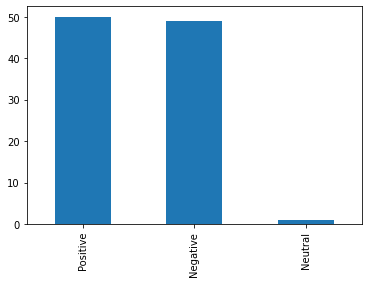

In [64]:
new_data['Emotion'].value_counts().plot(kind='bar')

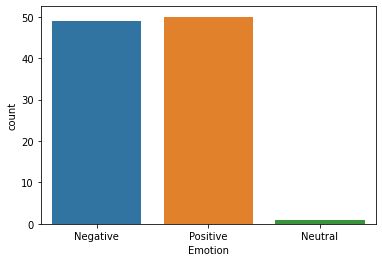

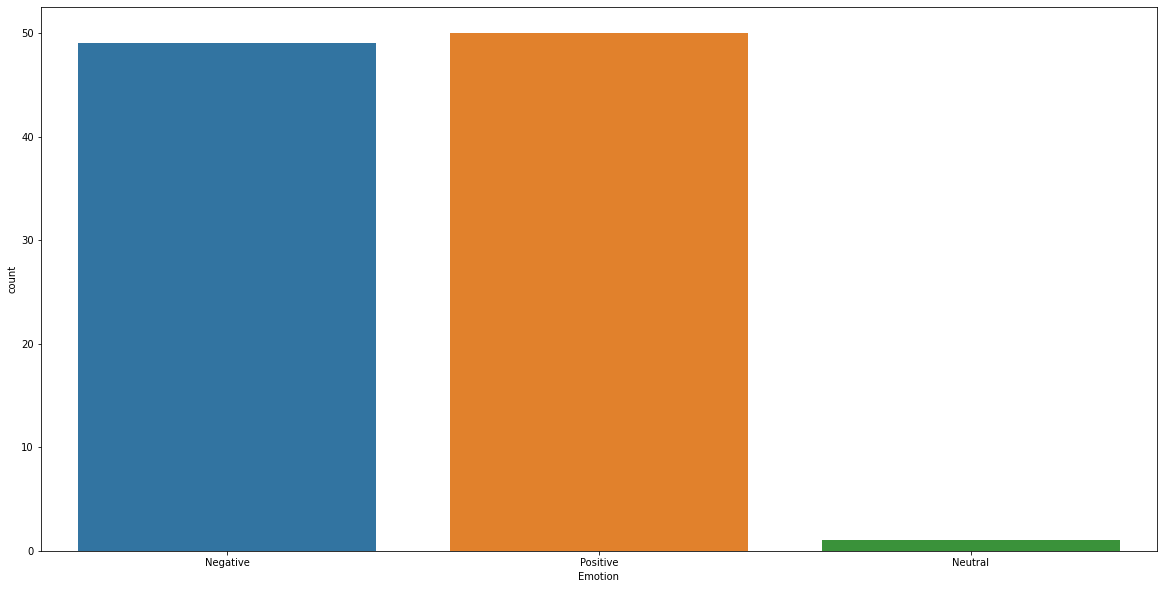

In [67]:
import matplotlib.pyplot as plt
sns.countplot(new_data['Emotion']) #old 
plt.figure(figsize=(20,10)) #new 
sns.countplot(x='Emotion', data=new_data)
plt.show()

In [69]:
new_data1=new_data[['product','Emotion','body']].copy()

In [70]:
new_data1.Emotion.value_counts()

Positive    50
Negative    49
Neutral      1
Name: Emotion, dtype: int64